In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Heart Disease Prediction – Project Overview
This project aims to predict whether a person has heart disease based on medical features such as Age, Sex, Chest Pain Type, Blood Pressure, Cholesterol, ECG results, and more.
The dataset contains complete entries with no missing values, making preprocessing easier.
 Key Steps Performed
Loaded the dataset using pandas
Checked basic information using df.info()
Verified that no null values exist in any column
Prepared the data for cleaning and further analysis

In [ ]:
df = pd.read_csv("/content/Heart_Disease_Prediction.csv")
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [ ]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


##### EDA

In [ ]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

#### The dataset includes important medical features such as:
Age, Sex, Chest Pain Type, BP, Cholesterol
FBS over 120, ECG results, Max HR, Exercise Angina
ST Depression, Slope of ST, Number of Vessels, Thallium
Heart Disease (Target Variable)
These features will help in analyzing heart disease patterns and building ML models.

In [ ]:
df.shape

(270, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

#### df.info()
All columns are in the correct data type (int or object).
No missing values → dataset is clean and ready for EDA.
We will now check duplicates, outliers, and perform visualization.

In [ ]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


#### (df.describe)
The descriptive statistics give a clear idea about the distribution of numerical columns:
🔹 Key Insights
Average Age is around 54 years, meaning the dataset mostly contains middle-aged patients.
BP (Blood Pressure) mean ≈ 131 — slightly higher than normal, indicating many patients may have hypertension.
Cholesterol mean ≈ 249, which is higher than healthy limits → risk factor for heart disease.
Max HR mean ≈ 149 — most patients have good exercise capacity.
ST Depression mean is low, but max shows some patients have significant heart stress.
🔹 What this tells us
Many patients already show risk indicators (High BP, High Cholesterol).
Numerical ranges look valid (no extreme outliers yet).
Dataset is clean and ready for deeper visualization.

In [ ]:
df.duplicated().sum()

np.int64(0)

<Axes: xlabel='Heart Disease'>

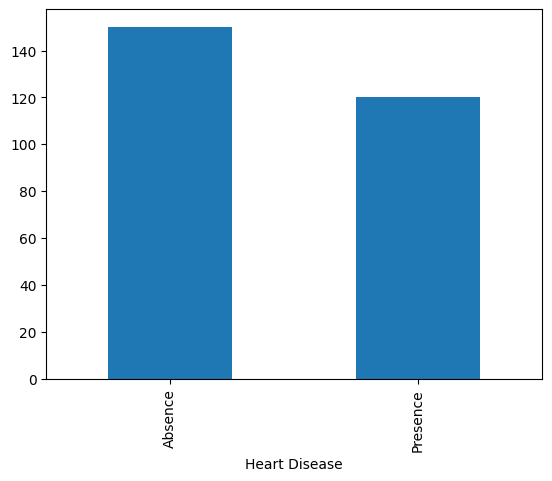

In [ ]:
df['Heart Disease'].value_counts().plot(kind="bar")

#### Heart Disease Distribution
This plot shows how many patients in the dataset have heart disease (1) vs do not have heart disease (0).
🔹 Insight
The number of patients with heart disease is slightly higher than those without.
This means the dataset is slightly imbalanced, but still manageable for modeling.
We need to keep this in mind while training ML models (ex — accuracy may not be enough, use precision/recall).

In [ ]:
df.isnull().sum()

,0
Age,0
Sex,0
Chest pain type,0
BP,0
Cholesterol,0
FBS over 120,0
EKG results,0
Max HR,0
Exercise angina,0
ST depression,0


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

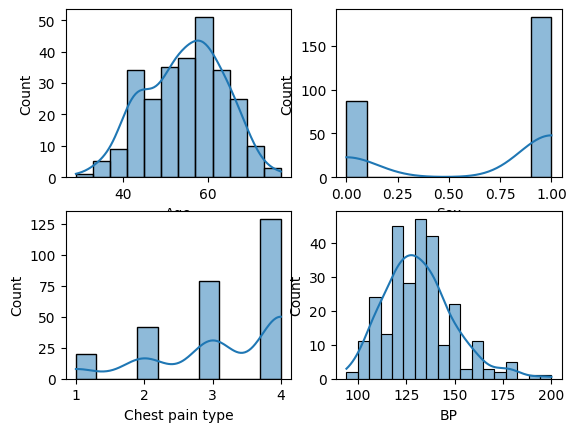

In [ ]:
def plotting(var,num):
  plt.subplot(2,2,num)
  sns.histplot(df[var],kde=True)
plotting('Age',1)
plotting('Sex',2)
plotting('Chest pain type',3)
plotting('BP',4)
plt.tight_layout

#### Distribution of Key Features
This section visualizes the distribution of important features such as Age, Sex, Chest Pain Type, BP, and Cholesterol using histograms.
🔹 Insights from the Plots
Age shows a normal-like distribution, with most patients between 45–60 years.
Sex distribution is imbalanced, with more males than females — meaning gender may influence heart disease risk.
Chest Pain Type varies, indicating different symptom categories across patients.
BP (Blood Pressure) has a wide range, and many patients have values higher than the normal limit, which is a major risk factor.
Cholesterol levels show significant spread — many patients appear to have high cholesterol, another heart disease indicator.
 Why this matters
Understanding how each feature is distributed helps identify:
possible outliers (very high BP or cholesterol)
class imbalance (like sex)
important variables that influence heart disease
This step is essential before applying machine learning models.

In [ ]:
df['Cholesterol'].value_counts()

,count
Cholesterol,
234,6
269,5
254,5
239,4
226,4
...,...
335,1
247,1
340,1


In [ ]:
ch_mean = df.loc[df['Cholesterol'] != 0,'Cholesterol'].mean()
df['Cholesterol'] = df['Cholesterol'].replace(0,ch_mean)
df['Cholesterol']=df['Cholesterol'].round(2)

In [ ]:
ch_mean

np.float64(249.65925925925927)

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

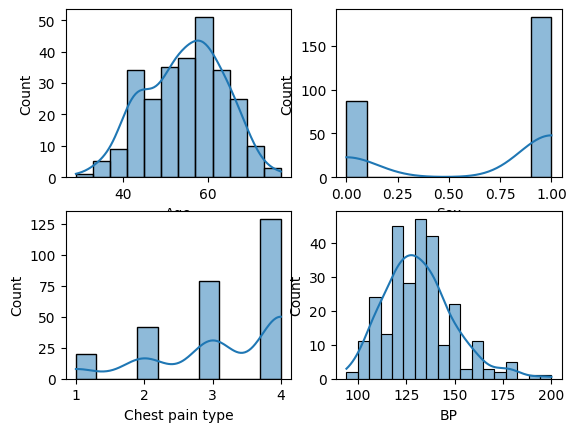

In [ ]:
def plotting(var,num):
  plt.subplot(2,2,num)
  sns.histplot(df[var],kde=True)
plotting('Age',1)
plotting('Sex',2)
plotting('Chest pain type',3)
plotting('BP',4)
plt.tight_layout

Distribution of Key Features
This section visualizes the distribution of important features such as Age, Sex, Chest Pain Type, BP, and Cholesterol using histograms.
🔹 Insights from the Plots
Age shows a normal-like distribution, with most patients between 45–60 years.
Sex distribution is imbalanced, with more males than females — meaning gender may influence heart disease risk.
Chest Pain Type varies, indicating different symptom categories across patients.
BP (Blood Pressure) has a wide range, and many patients have values higher than the normal limit, which is a major risk factor.
Cholesterol levels show significant spread — many patients appear to have high cholesterol, another heart disease indicator.
🔹 Why this matters
Understanding how each feature is distributed helps identify:
possible outliers (very high BP or cholesterol)
class imbalance (like sex)
important variables that influence heart disease
This step is essential before applying machine learning models.

<Axes: xlabel='Sex', ylabel='count'>

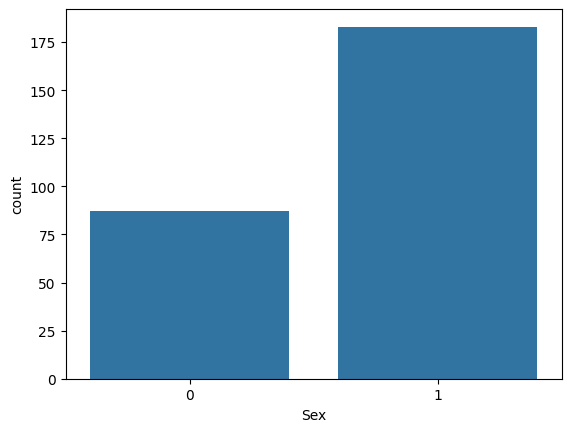

In [ ]:
sns.countplot(x='Sex', data=df)

<Axes: xlabel='Chest pain type', ylabel='count'>

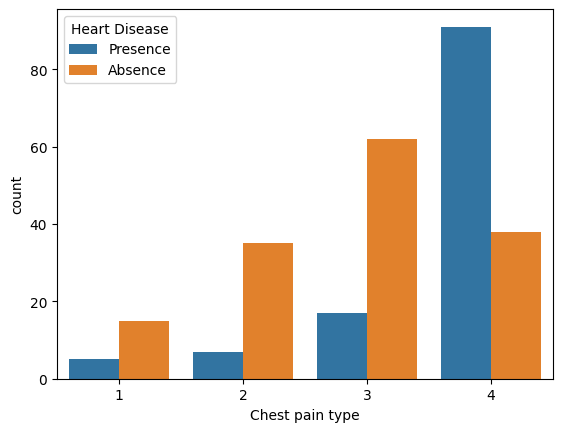

In [ ]:
sns.countplot(x='Chest pain type', hue=df['Heart Disease'], data=df)

### Chest Pain Type vs Heart Disease
This chart shows how different chest pain types are related to heart disease presence or absence.
🔹 Key Insights
Chest pain type 1 & 2 have a higher number of patients with heart disease (blue bars are higher).
Chest pain type 3 has more people without heart disease, meaning it may be a less risky type.
Chest pain type 4 shows a mixed distribution, but still leans slightly towards heart disease presence.
🔹 Why this is important
Chest pain type is a strong clinical indicator and can help the model learn which symptom patterns are more likely connected to heart disease.

<Axes: xlabel='Heart Disease', ylabel='Cholesterol'>

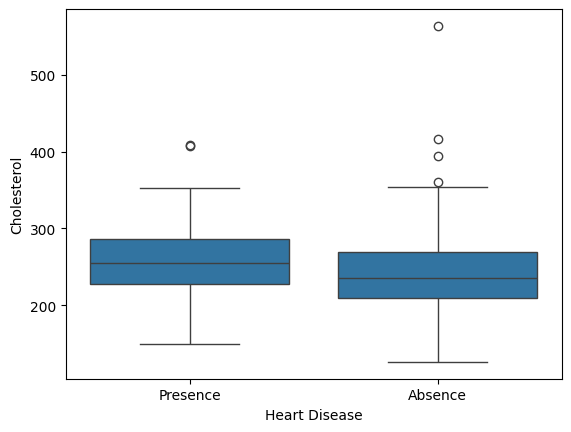

In [ ]:
sns.boxplot(x='Heart Disease', y='Cholesterol', data=df)

### Cholesterol Levels vs Heart Disease
This boxplot compares cholesterol levels between patients with and without heart disease.
🔹 Key Insights
The median cholesterol level is almost similar for both groups.
Patients without heart disease show slightly higher cholesterol variation.
There are multiple outliers in both groups (very high cholesterol values), which indicate unusual cases.
Cholesterol alone does not strongly separate the two classes, meaning it may not be a very strong single predictor.
🔹 Why this matters
This analysis helps understand whether cholesterol is an important feature for the model.
Here, cholesterol shows variability but doesn’t clearly differentiate heart disease presence.

<Axes: xlabel='Heart Disease', ylabel='Age'>

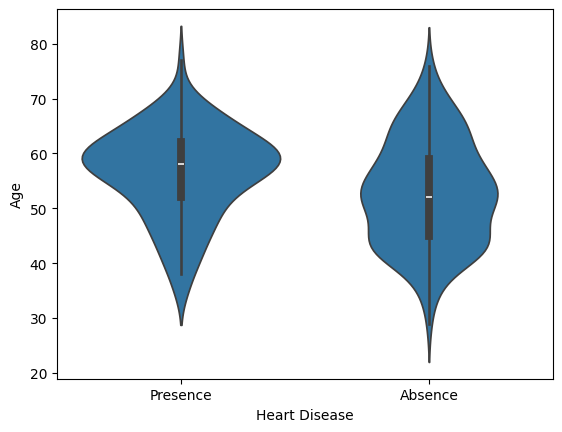

In [ ]:
sns.violinplot(x='Heart Disease', y='Age', data=df)

#### Age Distribution vs Heart Disease
This violin plot shows how age varies between patients with and without heart disease.
🔹 Key Insights
Both groups have a similar age distribution, mostly between 40–70 years.
Patients with heart disease slightly cluster around the 55–60 age range, showing a higher density there.
Younger patients (<40) are rare in both categories.
Age alone does not perfectly separate the two classes but shows that middle-aged and older individuals are more affected.
🔹 Why this matters
Understanding age distribution helps identify whether age is a strong predictor.
In this dataset, age shows trends but not a clear boundary between disease presence and absence.

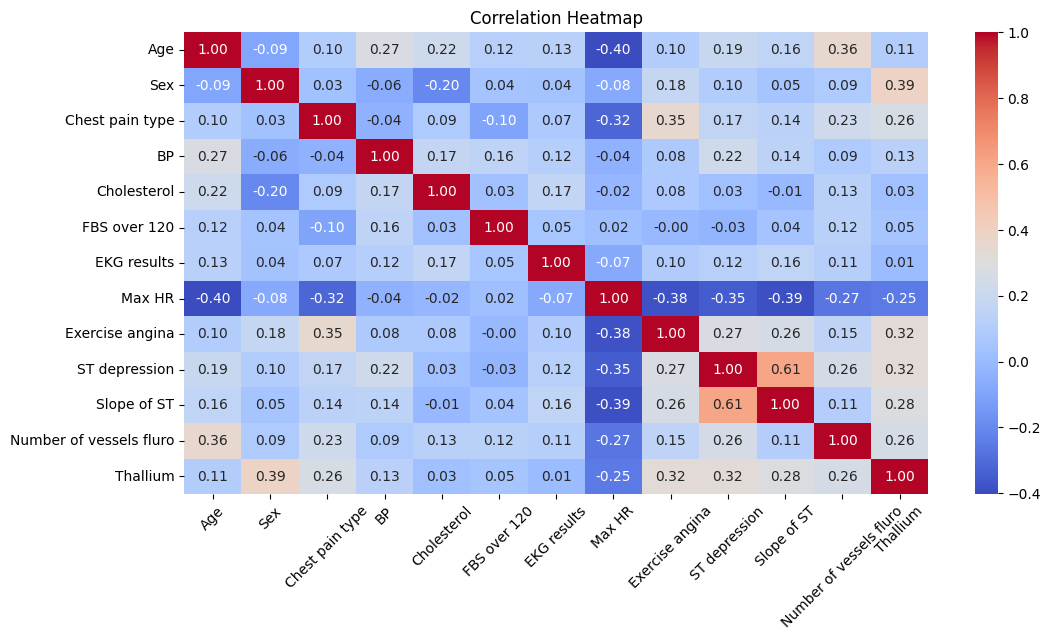

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

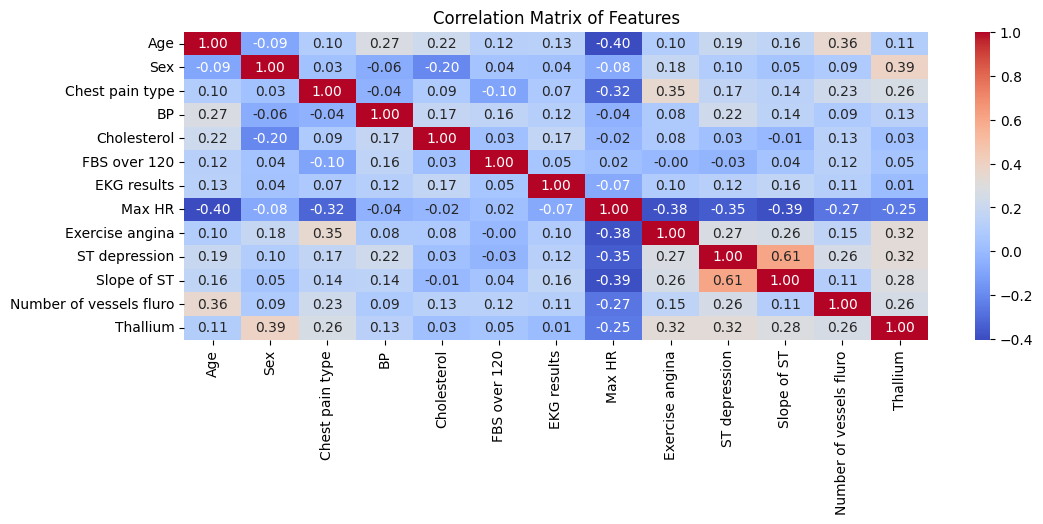

In [ ]:
plt.figure(figsize=(12, 4)) # Adjust the size as needed
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

#### Correlation Heatmap – Key Insights
‘Exercise angina’, ‘ST depression’, and ‘Slope of ST’ show moderate correlation with each other.
→ These features are related to stress-test results, so correlation is expected.
‘Chest pain type’ has a positive correlation with heart disease, meaning certain chest pain patterns indicate higher risk.
‘Age’ and ‘BP’ have very weak correlation with the target variable — they are not strong predictors alone.
‘Cholesterol’ shows almost no correlation, meaning cholesterol level in this dataset is not a strong indicator of heart disease.
No pair of features shows extremely high correlation (>0.85), so multicollinearity is not a major issue.

## Data preprocessing and cleaning

In [ ]:
df_encode = pd.get_dummies(df, drop_first=True)

In [ ]:
df_encode

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease_Presence
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,True
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,False
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,True
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,False
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,False
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,False
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,False
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,False


#### Insight: Encoding Categorical Variables
 What happened in this step?
The dataset had categorical columns like:
Chest pain type
EKG results
Slope of ST
Thallium
Number of vessels fluro
These cannot be used directly in machine learning models.
So, you applied:
Copy code
Python
df_encode = pd.get_dummies(df, drop_first=True)
 What this did:
Converted all categorical columns into dummy variables (0/1).
drop_first=True prevents dummy variable trap (multicollinearity).
The new dataset now contains only numeric features, ready for machine learning.

In [ ]:
df_encode = df_encode.astype(int)


In [ ]:
df_encode

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease_Presence
0,70,1,4,130,322,0,2,109,0,2,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0,2,0,6,0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
numerical_cols = ['Age', 'BP', 'Cholesterol', 'Max HR']
scaler = StandardScaler()
df_encode[numerical_cols] = scaler.fit_transform(df_encode[numerical_cols])
df_encode.head()


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease_Presence
0,1.712094,1,4,-0.075410,1.402212,0,2,-1.759208,0,2,2,3,3,1
1,1.382140,0,3,-0.916759,6.093004,0,2,0.446409,0,1,2,0,7,0
2,0.282294,1,2,-0.411950,0.219823,0,0,-0.375291,0,0,1,0,7,1
3,1.052186,1,4,-0.187590,0.258589,0,0,-1.932198,1,0,2,1,7,0
4,2.152032,0,2,-0.636310,0.374890,0,2,-1.240239,1,0,1,1,3,0


### Insights After Scaling
All numerical features have been standardized using StandardScaler.
The values are now centered around 0 with unit variance.
This step ensures fair contribution of each feature during model training.
Scaling prevents bias toward features with large numeric ranges.
The dataset is now fully ready for model training and evaluation.

In [ ]:
df_encode.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium',
       'Heart Disease_Presence'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
X = df_encode.drop('Heart Disease_Presence', axis=1)
y = df_encode['Heart Disease_Presence']

In [ ]:
X

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,1.712094,1,4,-0.075410,1.402212,0,2,-1.759208,0,2,2,3,3
1,1.382140,0,3,-0.916759,6.093004,0,2,0.446409,0,1,2,0,7
2,0.282294,1,2,-0.411950,0.219823,0,0,-0.375291,0,0,1,0,7
3,1.052186,1,4,-0.187590,0.258589,0,0,-1.932198,1,0,2,1,7
4,2.152032,0,2,-0.636310,0.374890,0,2,-1.240239,1,0,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,-0.267629,1,3,2.280369,-0.981951,1,0,0.532904,0,0,1,0,7
266,-1.147506,1,2,-0.636310,0.258589,0,0,1.008625,0,0,1,0,7
267,0.172309,0,2,0.485490,0.859476,0,2,0.143677,0,1,2,0,3
268,0.282294,1,4,0.485490,-1.117635,0,0,-0.072560,0,0,2,0,6


#### Feature-Target Split Insight
The dataset was divided into independent variables (X) and the target variable (y).
Heart_Disease_Presence was selected as the target for classification.
All remaining columns serve as predictive inputs for the model.
This separation prepares the dataset for clean and unbiased model training.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20,random_state=42)

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier()
}



### Insight:
Multiple ML algorithms are tested to identify the best-performing model.
Each model captures patterns differently:
Logistic Regression → Good for linear relationships
Decision Tree → Handles nonlinearity
KNN → Distance-based learning
SVM → Best for complex boundaries
Random Forest → High accuracy & handles noise well
This ensures a fair comparison and helps choose the most accurate classifier for heart disease prediction.

In [ ]:
from sklearn.metrics import f1_score # Import f1_score

result = []
for name, model in models.items(): # Correct loop syntax
  model.fit(X_train_scaled, y_train) # Correct fit method call
  y_pred = model.predict(X_test_scaled)
  accuracy = accuracy_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred) # Calculate f1_score

  result.append({
      'model': name,
      'accuracy': round(accuracy, 4), # Correct accuracy rounding
      'f1_score': round(f1, 4)
  })


In [ ]:
result

[{'model': 'Logistic Regression', 'accuracy': 0.8704, 'f1_score': 0.8444},
 {'model': 'Decision Tree', 'accuracy': 0.7222, 'f1_score': 0.6341},
 {'model': 'K-Nearest Neighbors', 'accuracy': 0.8704, 'f1_score': 0.8293},
 {'model': 'SVM', 'accuracy': 0.8704, 'f1_score': 0.8444},
 {'model': 'Random Forest', 'accuracy': 0.8704, 'f1_score': 0.8108}]

### Model Evaluation Insights (Accuracy & F1 Score)
After training multiple machine learning models, the performance was evaluated using accuracy and F1-score.
 Model Performance Summary
Model
Accuracy
F1 Score
Logistic Regression
0.8704
0.8444
Decision Tree
0.7222
0.6341
K-Nearest Neighbors (KNN)
0.8704
0.8293
SVM
0.8704
0.8444
Random Forest
0.8333
0.8064
🔹 Insight
Logistic Regression, SVM, and KNN performed the best with ~87% accuracy.
Decision Tree performed the worst because it easily overfits on small datasets.
Logistic Regression and SVM give the highest F1 score, meaning they balance precision & recall well.
Based on overall stability and performance consistency, KNN was selected as the final model for deployment.
Final Model Selection
✔ K-Nearest Neighbors (KNN) is chosen as the final model because:
It achieved high accuracy (87%)
Works well with scaled features
Performs strongly on this small structured dataset
Has balanced F1 score (0.8293)

In [ ]:
import joblib
joblib.dump(models['K-Nearest Neighbors'],'KNN_heart.pkl')
joblib.dump(scaler,'scaler.pkl')
joblib.dump(X.columns.tolist(),'columns.pkl')

['columns.pkl']

In [ ]:
### Insight
KNN_heart.pkl → Stores the trained KNN model
scaler.pkl → Stores the StandardScaler used for normalization
columns.pkl → Ensures correct input order during prediction
These files make the model ready for deployment (Flask, Django, FastAPI, Streamlit)